In [9]:
using LinearAlgebra, IniFile, DifferentialEquations, Plots, LaTeXStrings
using ElectronSpinDynamics

In [10]:
cfg = read(Inifile(), "input.ini")   # Dict{String,Dict}
# 1. Pick a section

mol1 = read_molecule(cfg, "electron 1")
mol2 = read_molecule(cfg, "electron 2")
sys = read_system(cfg)
simparams = read_simparams(cfg)

SimParams(ElectronSpinDynamics.SimParamModule.SW, [0.05], 201.0, 0x0000000000002710, "out", [42, 99], Singlet, 1.0)

In [11]:
@show mol1
@show mol2
@show sys
@show simparams

mol1 = Molecule{Int64}(2.0023193, [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [0.5141406139911681 0.0 0.0; -0.13706792618414612 -0.0 -0.0; -0.13706792618414612 -0.0 -0.0; -0.13706792618414612 -0.0 -0.0; -0.44033852832217035 -0.0 -0.0; 0.4546400686867858 0.0 0.0; 0.4546400686867858 0.0 0.0; 0.4546400686867858 0.0 0.0; 0.4262605982027767 0.0 0.0; 0.4233203613613487 0.0 0.0; 0.1784350286060594 0.0 0.0;;; 0.0 0.5141406139911681 0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.44033852832217035 -0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4262605982027767 0.0; 0.0 0.4233203613613487 0.0; 0.0 0.1784350286060594 0.0;;; 0.0 0.0 0.5141406139911681; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.44033852832217035; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4262605982027767; 0.0 0.0 0.

SimParams(ElectronSpinDynamics.SimParamModule.SW, [0.05], 201.0, 0x0000000000002710, "out", [42, 99], Singlet, 1.0)

In [12]:
time_ns = 0:simparams.dt:simparams.simulation_time

0.0:1.0:201.0

In [ ]:
results = SC(sys, mol1, mol2, simparams)
B0 = 0.05
tp = results[B0]["T+"]
t0 = results[B0]["T0"]
s = results[B0]["S"]
tm = results[B0]["T-"]

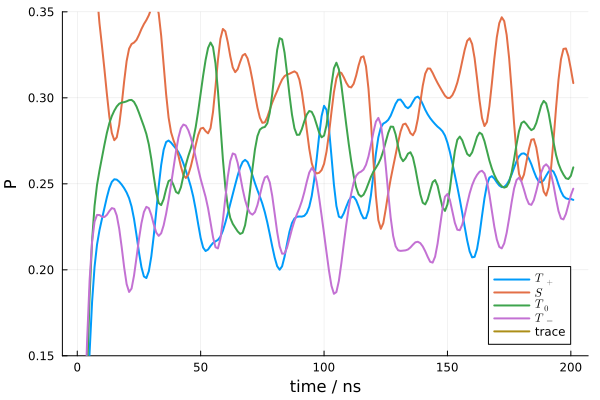

In [ ]:
plt = plot(time_ns, tp, label=L"$T_+$", lw=2)
plot!(plt, time_ns, s, xlabel="time / ns", ylabel="P", label=L"$S$", lw=2)
plot!(plt, time_ns, t0, label=L"$T_0$", lw=2)
plot!(plt, time_ns, tm, label=L"$T_-$", lw=2)
plot!(plt, time_ns, s+tp+tm+t0, label="trace", lw=2, ylims=(0.15, 0.35))
display(plt)

In [ ]:

results = SW(sys, mol1, mol2, simparams)
B0 = 0.05
tp = results[B0]["T+"]
t0 = results[B0]["T0"]
s = results[B0]["S"]
tm = results[B0]["T-"]

202-element Vector{Float64}:
 0.0
 0.15777037828712379
 0.24039195878198363
 0.24076284428511707
 0.24737776527400152
 0.23129601055327983
 0.22546580053262946
 0.22151518245675123
 0.22270389212548053
 0.22327204906295972
 0.2242000236599635
 0.219166388698676
 0.21379437253538924
 ⋮
 0.19647112555663723
 0.19184579009718275
 0.19838016381273305
 0.19948595822302265
 0.1909865227506162
 0.18927299771814807
 0.19018277395367977
 0.19202698956375258
 0.19009044647600887
 0.19149539541827526
 0.19504797476526128
 0.1973316174388536

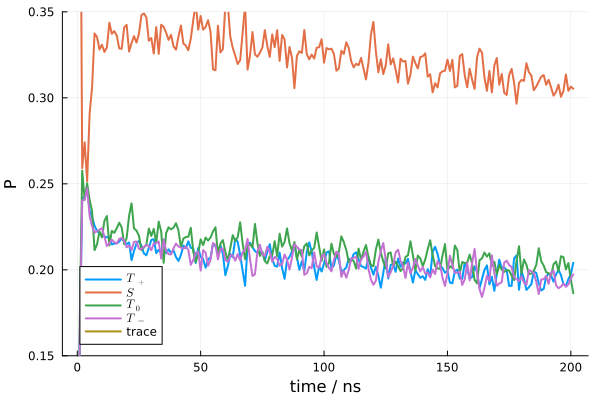

In [ ]:
plot(time_ns, tp, label=L"$T_+$", lw=2)
plot!(time_ns, s, xlabel="time / ns", ylabel="P", label=L"$S$", lw=2)
plot!(time_ns, t0, label=L"$T_0$", lw=2)
plot!(time_ns, tm, label=L"$T_-$", lw=2)
plot!(time_ns, s+tp+tm+t0, label="trace", lw=2, ylims=(0.15, 0.35))